In [138]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
from scipy.stats import norm
import statistics

%store -r Data_Set

import math
import seaborn as sns

import os

import torch
import torchvision
from torch import nn

import embedding_retriever as er
import csv

In [139]:
n = 0
for i in Data_Set.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('ef9e809f-c8ea-53c6-901b-8a6c8d9fcd2e', {'Year': [2015, 2014, 2013, 2012, 2011], 'Sector': '"721120"', 'R': [373067000, 351131000, 337435000, 339729000, 342567000], 'EBITDA': [78574000, 62582000, 61611000, 61320000, 65552000], 'NDE': [2.0, 3.8, 4.4, 4.3, 4.1], 'TDE': [34, 38, 40, 39, 40]}) 

('c026c58f-4174-543d-a53d-10f633785913', {'Year': [2008, 2007, 2006, 2005, 2004], 'Sector': '"441"', 'R': [1851647000, 1907776000, 1651285000, 1604991000, 1606731000], 'EBITDA': [99766000, 130155000, 173999000, 173209000, 117971000], 'NDE': [5.0, 3.9, 3.2, 2.6, 4.1], 'TDE': [315, 309, 369, 423, 265]}) 

('c76b720c-af3f-5531-921e-b733e5a26b47', {'Year': [2011, 2010, 2009, 2008, 2007], 'Sector': '"213112"', 'R': [26126999, 22849000, 23121000, 30975000, 20651000], 'EBITDA': [-3847000, -11399000, 19558000, -30667000, -3259000], 'NDE': [-16.0, -5.0, 2.8, -2.0, -9.0], 'TDE': [-272, 41, 32, 57, 28]}) 

('0f8fe59b-2865-57ac-adf6-47af34fbb9ed', {'Year': [2015, 2014, 2013, 2012, 2011], 'Sector': '"334413"',

In [140]:
print(len(Data_Set))

7440


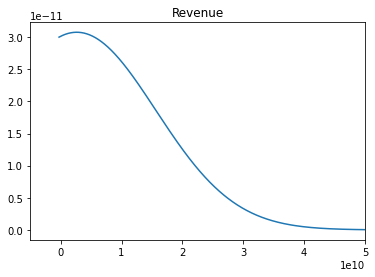

In [141]:
H = []

for i in Data_Set.values():
    for j in i['R']:
        H.append(j)
H.sort()
fit = stats.norm.pdf(H, np.mean(H), np.std(H))  #this is a fitting indeed

plt.xlim(-5000000000,50000000000)
plt.plot(H,fit)
plt.title("Revenue")
plt.show()   

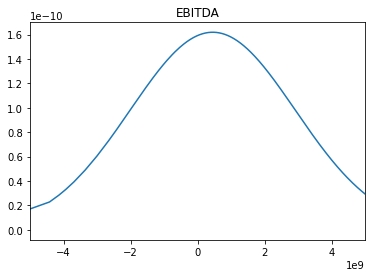

In [142]:
H = []

for i in Data_Set.values():
    for j in i['EBITDA']:
        H.append(j)
H.sort()
fit = stats.norm.pdf(H, np.mean(H), np.std(H))  #this is a fitting indeed

plt.xlim(-5000000000,5000000000)
plt.plot(H,fit)
plt.title("EBITDA")
plt.show()    

In [143]:
def Shifted_MinMax_Normalize(Data, normalizedMin, normalizedMax):
    
    Data_Set = Data.copy()
    
    R_Min = list(Data_Set.values())[0][5][1]
    R_Max = list(Data_Set.values())[0][5][1]
    
    E_Min = list(Data_Set.values())[0][7][1]
    E_Max = list(Data_Set.values())[0][7][1]
    
    for i in Data_Set.values():
        for j in range(len(i[5])):
            if i[5][j] < R_Min:
                R_Min = i[5][j]
            elif i[5][j] > R_Max:
                R_Max = i[5][j]
                
    print("R_Min", R_Min)
    
    for i in Data_Set.values():
        for j in range(len(i[7])):
            if i[7][j] < E_Min:
                E_Min = i[7][j]
            elif i[7][j] > E_Max:
                E_Max = i[7][j]
                
    print("E_Min", E_Min)
                
    for i in Data_Set.values():
        for j in range(len(i[5])):              
            mx = (i[5][j] - R_Min)/(R_Max - R_Min)
            preshiftNormalized = mx*(normalizedMax-normalizedMin);
            i[5][j] = round(preshiftNormalized + normalizedMin, 6)
    
    for i in Data_Set.values():
        for j in range(len(i[7])):              
            mx = (i[7][j] - E_Min)/(E_Max - E_Min)
            preshiftNormalized = mx*(normalizedMax-normalizedMin);
            i[7][j] = round(preshiftNormalized + normalizedMin, 6)

    return Data_Set


# SMMN_Data_Set = Shifted_MinMax_Normalize(Data_Set,0,10)

# n = 0
# for i in SMMN_Data_Set.items():
#     print(i,"\n")
#     n += 1
#     if n == 5:
#         break

In [144]:
Sector_List = ["511210", "2111", "325412"]

In [145]:
def Data_Set_Normalised(Data_Set):
    
    Data_Set_N = {}
    
    for i in Data_Set.items():
        ID,data = i
        
        Data_Set_N[ID] = {'Sector': data['Sector']}
        
        Data_Set_N[ID].update({'Revenue' : []})
        for j in data['R']:
            if j < 0:
                Data_Set_N[ID]['Revenue'].append(0)
            elif j in range(0,5000000):
                Data_Set_N[ID]['Revenue'].append(0.1)
            elif j in range(5000000,10000000):
                Data_Set_N[ID]['Revenue'].append(0.2)
            elif j in range(10000000,50000000):
                Data_Set_N[ID]['Revenue'].append(0.3)
            elif j in range(50000000,100000000):
                Data_Set_N[ID]['Revenue'].append(0.4)
            elif j in range(100000000,500000000):
                Data_Set_N[ID]['Revenue'].append(0.5)
            elif j in range(500000000,1000000000):
                Data_Set_N[ID]['Revenue'].append(0.6)
            elif j in range(1000000000,5000000000):
                Data_Set_N[ID]['Revenue'].append(0.7)
            elif j in range(5000000000,10000000000):
                Data_Set_N[ID]['Revenue'].append(0.8)
            elif j > 10000000000:
                Data_Set_N[ID]['Revenue'].append(0.9)
                
        
        Data_Set_N[ID].update({'EBITDA' : []})
        for j in data['EBITDA']:
            if j < 0:
                Data_Set_N[ID]['EBITDA'].append(0)
            elif j in range(0,5000000):
                Data_Set_N[ID]['EBITDA'].append(0.1)
            elif j in range(5000000,10000000):
                Data_Set_N[ID]['EBITDA'].append(0.2)
            elif j in range(10000000,50000000):
                Data_Set_N[ID]['EBITDA'].append(0.3)
            elif j in range(50000000,100000000):
                Data_Set_N[ID]['EBITDA'].append(0.4)
            elif j in range(100000000,500000000):
                Data_Set_N[ID]['EBITDA'].append(0.5)
            elif j in range(500000000,1000000000):
                Data_Set_N[ID]['EBITDA'].append(0.6)
            elif j in range(1000000000,5000000000):
                Data_Set_N[ID]['EBITDA'].append(0.7)
            elif j in range(5000000000,10000000000):
                Data_Set_N[ID]['EBITDA'].append(0.8)
            elif j > 10000000000:
                Data_Set_N[ID]['EBITDA'].append(0.9)
                
            
        Data_Set_N[ID].update({'NDE' : []})
        for j in data['NDE']:
            if j < 0 or j > 1:
                Data_Set_N[ID]['NDE'].append(0)
            else:
                Data_Set_N[ID]['NDE'].append(round(1 - j,4))
          
        
        Data_Set_N[ID].update({'TDE' : []})
        for j in data['TDE']:
            if j < 0 or j > 100:
                Data_Set_N[ID]['TDE'].append(0)
            else:
                Data_Set_N[ID]['TDE'].append(round(100 - j,4)/100)
                
        
        
    return Data_Set_N
    
    
Data_Set_N = Data_Set_Normalised(Data_Set)

In [146]:
%store Data_Set_N

Stored 'Data_Set_N' (dict)


In [147]:
n = 0
for i in Data_Set_N.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('ef9e809f-c8ea-53c6-901b-8a6c8d9fcd2e', {'Sector': '"721120"', 'Revenue': [0.5, 0.5, 0.5, 0.5, 0.5], 'EBITDA': [0.4, 0.4, 0.4, 0.4, 0.4], 'NDE': [0, 0, 0, 0, 0], 'TDE': [0.66, 0.62, 0.6, 0.61, 0.6]}) 

('c026c58f-4174-543d-a53d-10f633785913', {'Sector': '"441"', 'Revenue': [0.7, 0.7, 0.7, 0.7, 0.7], 'EBITDA': [0.4, 0.5, 0.5, 0.5, 0.5], 'NDE': [0, 0, 0, 0, 0], 'TDE': [0, 0, 0, 0, 0]}) 

('c76b720c-af3f-5531-921e-b733e5a26b47', {'Sector': '"213112"', 'Revenue': [0.3, 0.3, 0.3, 0.3, 0.3], 'EBITDA': [0, 0, 0.3, 0, 0], 'NDE': [0, 0, 0, 0, 0], 'TDE': [0, 0.59, 0.68, 0.43, 0.72]}) 

('0f8fe59b-2865-57ac-adf6-47af34fbb9ed', {'Sector': '"334413"', 'Revenue': [0.7, 0.7, 0.7, 0.7, 0.7], 'EBITDA': [0.5, 0.5, 0.5, 0.5, 0.5], 'NDE': [0, 1.0, 0, 0, 1.0], 'TDE': [0.94, 0.91, 0.99, 0.99, 0.99]}) 

('e31a81aa-71ed-5bf8-835d-358095bac6dc', {'Sector': '"424710"', 'Revenue': [0.5, 0.5, 0.5, 0.5, 0.5], 'EBITDA': [0.7, 0.7, 0.7, 0.7, 0.5], 'NDE': [0, 0, 0, 0, 0], 'TDE': [0, 0, 0, 0, 0]}) 



In [148]:
print(len(Data_Set_N))

7440


In [149]:
embedder = er.EmbeddingRetriever()

with open('Description.csv','r') as file:
    next(file)
    file = csv.reader(file, delimiter = ';')

    EN_Des = {}
    for row in file:
        try:
            ID,sector,description = row[0].split(",", 2)
            ID = ID[1:-1]
            if ID in Data_Set_N.keys():
                sector = sector[1:-1]
                if description == '"\n':
                    description = " "

                EN_Des[ID] = {}
                EN_Des[ID].update({'Sector' : sector, 'Description' : description[1:-2]})
                EN_Des[ID].update({'Description Emb' : np.round(embedder.get_bert_embedding(description[1:-2]),2)})


        except ValueError:
            continue


In [150]:
n = 0
for i in EN_Des.items():
    print(i,"\n")
    n += 1
    if n == 1:
        break

('e809884c-8121-52f8-806c-6d1b86adae2e', {'Sector': '511210', 'Description': 'Forescout Technologies, Inc. provides device visibility and control solution', 'Description Emb': array([[ 0.58,  0.77,  0.89,  0.75,  1.19,  0.68,  0.27,  1.02,  0.86,
         0.63,  0.44,  0.27,  0.73,  1.86,  0.54,  1.2 ,  0.28,  0.99,
         0.58,  0.7 ,  0.43,  0.05,  0.74,  1.49,  0.9 ,  0.63,  0.23,
         0.38,  0.25,  0.89,  0.77,  0.98,  0.92,  0.41,  0.56,  0.35,
         0.3 ,  0.56,  0.65,  0.71,  0.05,  0.34,  1.13,  0.47,  0.94,
         0.61,  1.12,  1.23,  0.74,  0.91,  0.08,  1.4 ,  1.04,  0.47,
         0.92,  0.97,  0.93,  0.23,  1.4 ,  0.54,  0.43,  0.5 ,  0.67,
         0.68,  0.85,  0.29,  0.82,  1.15,  0.09,  0.6 ,  0.79,  0.96,
         0.46,  0.84,  0.39,  0.76,  0.32,  1.37,  0.87,  0.92,  0.73,
         1.37,  1.02,  0.88,  0.77,  1.16,  0.53,  0.99,  0.43,  1.19,
         0.69,  0.66,  1.14,  0.9 ,  0.87,  0.65,  0.43,  0.32,  0.68,
         1.49,  0.92,  0.42,  0.78,  0.62, 

In [151]:
%store EN_Des

Stored 'EN_Des' (dict)


In [152]:
print(len(EN_Des))

756


In [153]:
import warnings
warnings.filterwarnings('ignore')

Text_Embedding = embedder.get_bert_embeddings(['Hello World','Hi','Hello'])
print(np.round(Text_Embedding,5))

[[0.83098 0.20714 0.87999 ... 0.10433 0.28876 0.4544 ]
 [0.76542 0.25424 0.65867 ... 0.37093 0.29731 0.21371]
 [0.58009 0.27592 0.57657 ... 0.39631 0.2833  0.4119 ]]


In [154]:
Final_Data_Set_Nor = {}
Data_Map = {}
n = 0
for i in EN_Des.keys():
    
    Final_Data_Set_Nor[i] = {}
    Final_Data_Set_Nor[i].update(Data_Set_N[i])
    Final_Data_Set_Nor[i].update({ 'Description Embedding' : EN_Des[i]['Description Emb']})
    Data_Map[n] = i
    n += 1
    
    
n = 0
for i in Final_Data_Set_Nor.items():
    print(i,"\n")
    n += 1
    if n == 1:
        break

%store Final_Data_Set_Nor
%store Data_Map

('e809884c-8121-52f8-806c-6d1b86adae2e', {'Sector': '"511210"', 'Revenue': [0.5, 0.5, 0.5, 0.5, 0.5], 'EBITDA': [0, 0, 0, 0, 0], 'NDE': [1.0, 0, 0, 0.2, 0], 'TDE': [0.53, 0.88, 0.81, 0, 0.29], 'Description Embedding': array([[ 0.58,  0.77,  0.89,  0.75,  1.19,  0.68,  0.27,  1.02,  0.86,
         0.63,  0.44,  0.27,  0.73,  1.86,  0.54,  1.2 ,  0.28,  0.99,
         0.58,  0.7 ,  0.43,  0.05,  0.74,  1.49,  0.9 ,  0.63,  0.23,
         0.38,  0.25,  0.89,  0.77,  0.98,  0.92,  0.41,  0.56,  0.35,
         0.3 ,  0.56,  0.65,  0.71,  0.05,  0.34,  1.13,  0.47,  0.94,
         0.61,  1.12,  1.23,  0.74,  0.91,  0.08,  1.4 ,  1.04,  0.47,
         0.92,  0.97,  0.93,  0.23,  1.4 ,  0.54,  0.43,  0.5 ,  0.67,
         0.68,  0.85,  0.29,  0.82,  1.15,  0.09,  0.6 ,  0.79,  0.96,
         0.46,  0.84,  0.39,  0.76,  0.32,  1.37,  0.87,  0.92,  0.73,
         1.37,  1.02,  0.88,  0.77,  1.16,  0.53,  0.99,  0.43,  1.19,
         0.69,  0.66,  1.14,  0.9 ,  0.87,  0.65,  0.43,  0.32,  0.68,
 

In [155]:
print(len(Final_Data_Set_Nor))

756


In [156]:
Sector_Des = {'511210' : {'Sector Des':'Software Publishers'},
                      '2111' : {'Sector Des':'Oil and Gas Extraction/Production'},
                      '325412' : {'Sector Des':'Pharmaceutical Prepare Manufacturing'}}

Sector_Des_Emb = {}
n = 0
for i in Sector_Des.keys():
    l = []
    for j in np.round(embedder.get_bert_embedding(Sector_Des[i]['Sector Des']),2)[0]:
        l.append(j)
    Sector_Des[i].update({'Sector Des Emb' : l})

    
n = 0
for i in Sector_Des.items():
    print(i,"\n")
    n += 1
    if n == 3:
        break

%store Sector_Des

('511210', {'Sector Des': 'Software Publishers', 'Sector Des Emb': [0.91, 0.33, 0.34, 0.46, 1.09, 0.29, 0.57, 0.53, 0.48, 0.16, 0.39, 0.6, 0.4, 0.49, 0.62, 0.18, 0.05, 0.46, 0.56, 0.25, 0.59, 0.34, 0.76, 0.45, 0.45, 0.48, 0.02, 0.39, -0.05, 0.79, 0.7, 0.82, 0.56, 0.5, 0.3, 0.22, 0.25, 0.16, 0.05, 0.21, 0.65, 0.18, 0.74, 0.27, 0.6, 0.11, 0.7, 0.6, 0.14, 0.69, 0.11, 0.96, 0.64, 0.26, 0.56, 0.57, 1.21, 0.51, 0.91, 0.44, 0.62, 0.61, 0.42, 0.47, 0.68, 0.69, 0.68, 0.16, -0.36, 0.6, 0.03, 0.39, 0.67, 0.23, 0.31, 0.4, 0.44, 0.89, 0.56, 0.37, 0.5, 1.31, 0.31, 0.54, 0.24, 0.7, 0.43, 0.27, 0.24, 0.47, 0.35, 0.1, 0.35, 0.36, 0.27, 0.56, 0.22, 0.38, 0.24, 0.16, 0.15, 0.3, 0.15, 0.9, 0.16, 0.33, 0.31, 0.46, 0.43, 1.07, 0.82, 0.33, 0.47, 0.19, -0.22, 1.05, 0.63, 0.3, 0.42, 0.39, 0.44, 0.6, 0.25, 1.53, 0.23, 0.52, 0.4, 0.61, 0.43, 0.18, 0.27, 0.58, 0.54, 0.66, 0.71, 0.85, 0.71, 0.31, 0.84, 0.26, 0.35, 0.83, 0.66, -0.03, 0.53, 0.42, 0.93, 0.41, 0.51, 0.48, 1.1, 0.77, -0.19, 0.4, 0.28, 0.2, 0.89, 0.76, 

In [161]:
#np.round(embedder.get_bert_embedding('[0.4, 0.5, 0.6, 0.7, 0.8]'),2)

Financial_Bert_Emb = {}
n = 0
for i in Data_Set_N.items():
    ID,data = i
    
    if data['Sector'][1:-1] in Sector_List:
        Financial_Bert_Emb[ID] = {}
        Financial_Bert_Emb[ID].update({'Sector' : data['Sector'][1:-1],
                            'Revenue' : np.round(embedder.get_bert_embedding(str(data['Revenue'])),2),
                           'EBITDA' : np.round(embedder.get_bert_embedding(str(data['EBITDA'])),2),
                           'NDE' : np.round(embedder.get_bert_embedding(str(data['NDE'])),2),
                           'TDE' : np.round(embedder.get_bert_embedding(str(data['TDE'])),2)})

n = 0
for i in Financial_Bert_Emb.items():
    print(i,"\n")
    n += 1
    if n == 1:
        break



('36bd8aa8-f4f7-5bf7-9718-4945675a75d2', {'Sector': '2111', 'Revenue': array([[ 0.47,  0.96,  1.61,  0.6 ,  0.89,  0.33,  0.58,  1.02,  0.92,
         0.51,  0.33,  0.46,  0.43,  1.43,  1.02,  1.44,  0.57,  0.79,
         1.11,  1.05,  0.69,  0.65,  0.93,  1.23,  0.76,  0.72,  0.59,
         0.29,  0.23,  1.21,  0.95,  0.55,  1.06,  1.27,  1.07,  0.33,
         1.27,  0.97,  0.94,  1.02,  0.36,  0.37,  0.79,  0.62,  0.87,
         0.5 ,  1.82,  0.62,  0.29,  0.36, -0.04,  0.53,  0.7 ,  0.83,
         0.56,  0.73,  0.88,  0.2 ,  0.65,  0.38,  0.71,  0.65,  0.93,
         0.62,  0.73,  0.76,  0.96,  1.58,  0.43,  0.99,  0.12,  0.61,
         0.62,  1.17,  0.78,  0.57,  0.84,  0.69,  0.92,  0.37,  0.18,
         0.78,  1.37,  0.6 ,  1.16,  0.42,  0.59,  0.45,  0.29,  1.28,
         0.98,  0.3 ,  0.58,  0.62,  0.34,  0.57,  0.54,  0.25,  1.17,
         0.73,  0.65,  0.36,  1.11,  0.94,  0.42,  0.98,  0.97,  0.73,
         0.29,  1.25,  0.82,  0.9 ,  0.59,  1.04,  0.6 ,  0.6 ,  0.48,
      

In [162]:
%store Financial_Bert_Emb

Stored 'Financial_Bert_Emb' (dict)


In [163]:
len(Financial_Bert_Emb)

756

In [189]:
from scipy import spatial

dataSetI = [0.4, 0.0, 0.5, 0.5, 0.5]
dataSetII = [0.0, 0.5, 0.5, 0.5, 0.5]
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
print(result)

0.7862136275414386


In [192]:
dataSetI = np.round(embedder.get_bert_embedding('.4 .0 .5 .5 .5'),2)
dataSetII = np.round(embedder.get_bert_embedding('.0 .5 .5 .5 .5'),2)
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
print(result)

0.9854585528373718
